In [1]:
# default_exp multi

# Multisequence Analysis Overview

> Analyse collections of sequences

The pysan library's `multi` module contains methods for analysing collections of sequences. These collections can contain two or more sequences, with methods in this module either accepting the full collection, or a single pair of sequences, as input. Multisequence analysis can answer much richer questions than any sequence in isolation, and can be as simple or complex as the research question requires.

The first step of any multisequence analysis is to plot the data. The `multi` module's `plot_sequences` method can do just that, with the optional parameter of gaps between each of the elements.

In [2]:
#export
import matplotlib.pyplot as plt
import numpy as np
from pysan.elements import get_alphabet
def plot_sequences(sequences, gap=True):
    "Creates a scatter style sequence plot for a collection of sequences."
    max_sequence_length = max([len(s) for s in sequences])
    plt.figure(figsize=[max_sequence_length*0.3,0.3 * len(sequences)])

    for y,sequence in enumerate(sequences):
        np_sequence = np.array(sequence)
        alphabet_len = len(get_alphabet(sequence))

        plt.gca().set_prop_cycle(None)
        unique_values = get_alphabet(sequence)
        for i, value in enumerate(unique_values):

            if gap:
                points = np.where(np_sequence == value, y + 1, np.nan)
                plt.scatter(x=range(len(np_sequence)), y=points, marker='s', label=value, s=100)
            else:
                points = np.where(np_sequence == value, 1, np.nan)
                plt.bar(range(len(points)), points, bottom=[y for x in range(len(points))], width=1, align='edge', label=i)

    if gap:
        plt.ylim(0.4, len(sequences) + 0.6)
        plt.xlim(-0.6, max_sequence_length - 0.4)
    else:
        plt.ylim(0,len(sequences))
        plt.xlim(0,max_sequence_length)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.0, 1.1), loc='upper left')
    plt.tick_params(
        axis='y',
        which='both',
        left=False,
        labelleft=False)

    return plt

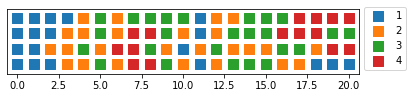

In [3]:
from pysan.multi import plot_sequences
s1 = [1,1,1,2,2,3,2,4,4,3,2,1,2,3,3,3,2,2,1,1,1]
s2 = [1,1,2,2,3,2,4,4,3,2,1,2,3,2,2,2,3,3,2,4,4]
s3 = [1,1,1,2,2,3,2,4,4,3,2,1,2,3,3,3,4,4,4,3,3]
s4 = [1,1,1,1,2,3,2,3,3,3,3,1,2,2,3,3,3,4,4,4,4]
sequences = [s1,s2,s3,s4]
plt = plot_sequences(sequences)
plt.show()

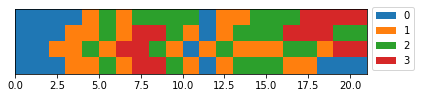

In [4]:
from pysan.multi import plot_sequences
plt = plot_sequences(sequences, gap=False)
plt.show()